# NLP Assingment - Kaggle-SMS-Spam-Collection-Dataset

Classify messages as Spam or Ham

Context The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Content The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


We will following the approach outlined below to identify whether the message is spam or not.

1. Download the file and set it as a Dataframe 

2. Remove punctuations, special characters and stopwords from the text in ‘sms’ column. Convert the text to lower case

3. Create two objects X and y. X will be the v1 column of dataframe and y will be the ‘v2 column. create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix

4. Display the POS tagging on the first 4 rows of ‘sms’

5. Build and display a dependency parser tree for the sentence : “Sansa, the second child of Ned and Catelyn, remained captive in King's Landing after her father was executed.”

# Import required libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
import spacy
from spacy import displacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
import re


%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Reading the dataset into pandas

1. Download the file and set it as a Dataframe. (1 Marks)



In [2]:
filepath = 'https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection'

messages = pd.read_csv(filepath,encoding='latin-1', sep ='\t',names=["label", "message"])

In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.shape

(5572, 2)

The describe() method from pandas provide a summary statistics. Such as, there are 5,572 labels and messages. There are two unique labels indicating for “ham” and “spam”.

In [5]:
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow.head())

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls


In [6]:
duplicatedRow.shape

(403, 2)

The duplicatedRow shows, there are 403 duplicated messages.

In [7]:
#dropping duplicates
messages.drop_duplicates(inplace=True)

In [8]:
#shape of dataframe after removal of duplicates
messages.shape

(5169, 2)

# Data Cleaning and Preprocessing

2. Remove punctuations, special characters and stopwords from the text in ‘sms’ column. Convert the text to lower case. (3 Marks)

In [9]:
def clean_util(text):
  rem_special = re.sub('[^A-Za-z0-9]+', ' ', text)
  punc_rmv = [char for char in rem_special if char not in string.punctuation]
  punc_rmv = "".join(punc_rmv)
  stopword_rmv = [w.strip().lower() for w in punc_rmv.split() if w.strip().lower() not in stopwords.words('english')]
  return " ".join(stopword_rmv)

In [10]:
messages['message'] = messages['message'].apply(clean_util)

In [11]:
messages.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


3. Create two objects X and y. X will be the v1 column of dataframe and y will be the ‘v2 column. create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix

# dividing data in X & Y



In [12]:
messages

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,b going esplanade fr home
5569,ham,pity mood suggestions
5570,ham,guy bitching acted like interested buying some...


In [13]:
X = messages.message
y = messages.label

In [14]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3876,) (1293,) (3876,) (1293,)


In [15]:
vect = CountVectorizer()
# transform testing data (using fitted vocabulary) into a document-term matrix
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Applying MultinomialNB Classifier

In [16]:
# Instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

# Train the model 

nb.fit(X_train_dtm, y_train)

# Make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# Calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9837587006960556


# Display the confusion Matrix 
printing the confusion matrix to compare actual and prediction

In [17]:
cf_matrix=metrics.confusion_matrix(y_test, y_pred_class)
cf_matrix

array([[1139,    7],
       [  14,  133]])

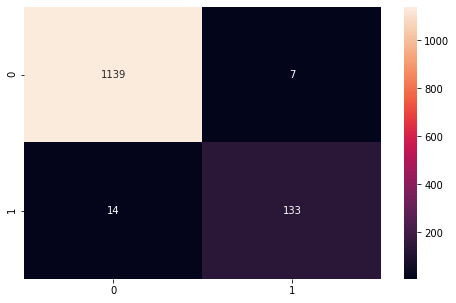

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=True, fmt='d')

4. Display the POS tagging on the first 4 rows of ‘sms’ (4 Marks)

In [19]:
from nltk import pos_tag
list1 = messages.message.tolist()
list2 = list1[:4]
list2

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'u dun say early hor u c already say']

In [20]:
stopWords = set(stopwords.words('english'))
words = []
for text in list2:
  text.lower
  words.append(word_tokenize(text))
flattened_list = []
for sublist in words:
    for item in sublist:
        flattened_list.append(item) 
wordsFiltered = []

In [21]:
set_wo_punctuation = [];
for sentence in flattened_list:
  trimmed_text = sentence.strip()
  converted_text = trimmed_text.lower()
  tokenized_list = word_tokenize(converted_text)
  punct_tokenized_list = wordpunct_tokenize(converted_text)
  vocab_set = set(tokenized_list)
  set_wo_stopwords = vocab_set - set(stopwords.words("english"))
  set_wo_punctuation.append(set_wo_stopwords - set(punctuation))
  k = 1
  punctuation_list = [];
for i in set_wo_punctuation:  
  punctuation_list.append(list(i))
  k = k+1
flattened_punctuation_list = []
for sublist in punctuation_list:
    for item in sublist:
        flattened_punctuation_list.append(item)

In [22]:
stemmed_list= []
stemObj = SnowballStemmer("english")
for i in flattened_punctuation_list:
    stemmed_list.append(stemObj.stem(i))
pos_tag_list = pos_tag(flattened_punctuation_list)
print(pos_tag_list)

[('go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy', 'NN'), ('available', 'JJ'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'VBP'), ('buffet', 'JJ'), ('cine', 'NN'), ('got', 'VBD'), ('amore', 'RB'), ('wat', 'JJ'), ('ok', 'JJ'), ('lar', 'JJ'), ('joking', 'NN'), ('wif', 'NN'), ('u', 'JJ'), ('oni', 'RB'), ('free', 'JJ'), ('entry', 'NN'), ('2', 'CD'), ('wkly', 'JJ'), ('comp', 'NN'), ('win', 'VBP'), ('fa', 'JJ'), ('cup', 'NN'), ('final', 'JJ'), ('tkts', 'NN'), ('21st', 'CD'), ('may', 'MD'), ('2005', 'CD'), ('text', 'NN'), ('fa', 'NN'), ('87121', 'CD'), ('receive', 'JJ'), ('entry', 'NN'), ('question', 'NN'), ('std', 'VBD'), ('txt', 'JJ'), ('rate', 'NN'), ('c', 'NNS'), ('apply', 'VBP'), ('08452810075over18', 'CD'), ('u', 'JJ'), ('dun', 'NNS'), ('say', 'VBP'), ('early', 'JJ'), ('hor', 'NN'), ('u', 'JJ'), ('c', 'NN'), ('already', 'RB'), ('say', 'VB')]


# Build and display a dependency parser tree 

5. Build and display a dependency parser tree for the sentence : “Sansa, the second child of Ned and Catelyn, remained captive in King's Landing after her father was executed.” 

In [23]:
nlp=spacy.load('en_core_web_sm')
text="Sansa, the second child of Ned and Catelyn, remained captive in King's Landing after her father was executed."
for token in nlp(text):
 print(token.text,'=>',token.dep_,'=>',token.head.text)

Sansa => nsubj => remained
, => punct => Sansa
the => det => child
second => amod => child
child => appos => Sansa
of => prep => child
Ned => pobj => of
and => cc => Ned
Catelyn => conj => Ned
, => punct => Sansa
remained => ROOT => remained
captive => acomp => remained
in => prep => captive
King => poss => Landing
's => case => King
Landing => pobj => in
after => mark => executed
her => poss => father
father => nsubjpass => executed
was => auxpass => executed
executed => advcl => remained
. => punct => remained


In the above code example, the dep_ returns the dependency tag for a word, and head.text returns the respective head word. The word 'remained' has a dependency tag of ROOT. This tag is assigned to the word which acts as the head of many words in a sentence but is not a child of any other word.

## visualizing the dependency parse

In [24]:
displacy.render(nlp(text),jupyter=True)

# Conclusion



The ham-spam dataset is downloaded , mentioned tasks such as  punctuations , special characters and stopwords are found. MultiNomialNB method is applied, model built and confusion matrix is generated. POS Tagging for the first 4 words of the sms list is created. Dependency parser tree for the given sentence is built and displayed.